In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_rows', None)

In [3]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv'
#!wget $data

df = pd.read_csv('course_lead_scoring.csv')
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NaN,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NaN,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


### Data Prep

In [4]:
df.isnull().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [5]:
categorical = ['lead_source', 'industry', 'employment_status', 'location'] 
numerical = ['number_of_courses_viewed', 'annual_income', 'interaction_count', 'lead_score']

In [6]:
for i in categorical:
    df[i] = df[i].fillna('NA')

for i in numerical:
    df[i] = df[i].fillna(0.0)

In [8]:
df.isnull().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

#### Questão 1:
##### R: retail

In [29]:
df['industry'].mode()

0    retail
Name: industry, dtype: object

In [22]:
df['industry'].value_counts().sort_values(ascending=False).head(1)

industry
retail    203
Name: count, dtype: int64

#### Questão 2:
##### R: number_of_courses_viewed and interaction_count

In [ ]:
df[numerical].corr()

,number_of_courses_viewed,annual_income,interaction_count,lead_score
number_of_courses_viewed,1.000000,0.009770,-0.023565,-0.004879
annual_income,0.009770,1.000000,0.027036,0.015610
interaction_count,-0.023565,0.027036,1.000000,0.009888
lead_score,-0.004879,0.015610,0.009888,1.000000


<Axes: >

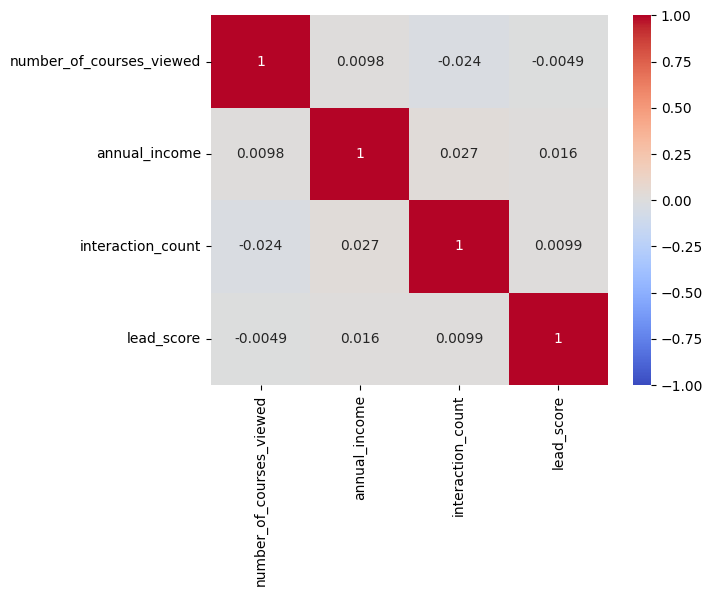

In [ ]:
sns.heatmap(df[numerical].corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')
# Maior é 0.027 > interaction_count x annual_income

# interaction_count and lead_score >> 0.010
# number_of_courses_viewed and lead_score >> -0.005
# number_of_courses_viewed and interaction_count >> 0.024
# annual_income and lead_score >> 0.016

#### Questão 3:
##### R: lead_source

In [30]:
# Splitando os dados

from sklearn.model_selection import train_test_split

In [31]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
len(df_full_train), len(df_train), len(df_test), len(df_val)

(1169, 876, 293, 293)

In [33]:
# Resetamos os indíces dos DFs apenas para não ficar embaralhado

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [35]:
y_full_train = df_full_train['converted'].values
y_train = df_train['converted'].values
y_val = df_val['converted'].values
y_test = df_test['converted'].values

In [36]:
del df_full_train['converted']
del df_train['converted']
del df_val['converted']
del df_test['converted']

In [37]:
# Mutual information

from sklearn.metrics import mutual_info_score

In [40]:
mutual = {}
for i in categorical:
    a = round(mutual_info_score(y_train,df_train[i]),2)
    mutual[i] = a
df_mutual = pd.DataFrame(list(mutual.items()), columns=['feature', 'mutual_info (%)'])
df_mutual = df_mutual.sort_values(by="mutual_info (%)", ascending=False).reset_index(drop=True)
df_mutual

,feature,mutual_info (%)
0,lead_source,0.04
1,industry,0.01
2,employment_status,0.01
3,location,0.00
